# PREDICTED MPG FOR CARS
Here the task is to predict the  mpg of the car to see the fuel efficiency of that car based on different attributes of the car.

## ATTRIBUTE INFORMATION:
    1. Cylinder    : Number of cylinder used in a car 
    2. Horsepower  : Horsepower (hp) is a unit of measurement of power
    3. Weight      : weight of a car
    4. Acceleartion:It is a vehicle's capacity to gain speed
    5. Model year  : year when this model is launched
    6. Car name    : Name of the car
    7. Origin      :Place where it is created
    8. MPG         :It shows full efficiency of the car
    9. Displacement:Changing position of a car
    
        

In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression# for linear regression
from sklearn.model_selection import train_test_split#split data into train and test
#origin:
#1:Asia
#2:Europe
#3:America

In [20]:
#load data
data=pd.read_csv("auto-mpg.csv")

In [21]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
data.shape

(398, 9)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 24.9+ KB


In [24]:
data=data.drop("car name",axis=1)

In [25]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [26]:
data['origin']=data['origin'].replace({1:'Asian',2:'Europe',3:'America'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,Asian
1,15.0,8,350.0,165,3693,11.5,70,Asian
2,18.0,8,318.0,150,3436,11.0,70,Asian
3,16.0,8,304.0,150,3433,12.0,70,Asian
4,17.0,8,302.0,140,3449,10.5,70,Asian


In [27]:
#one hot encoding technique
data=pd.get_dummies(data,columns=['origin'])

## data.info()

In [29]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asian,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0


In [30]:
hidigit=pd.DataFrame(data.horsepower.str.isdigit())
data[hidigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asian,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,0,1,0
126,21.0,6,200.0,?,2875,17.0,74,0,1,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,0,1,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,0,1,0


#? are non numeric data,we can take it as a missing values

In [31]:
data=data.replace('?',np.nan)
data[hidigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asian,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,0,1,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,0,1,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,0,1,0


In [34]:
medianfiller=lambda x:x.fillna(x.median())

In [35]:
data=data.apply(medianfiller,axis=0)
data['horsepower']=data['horsepower'].astype('float64')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Asian    398 non-null    uint8  
 9   origin_Europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.0 KB


### PAIRPLOT - FOR CHECKING MEASURE OF ASSOCIATION AMONG VARIABLES.

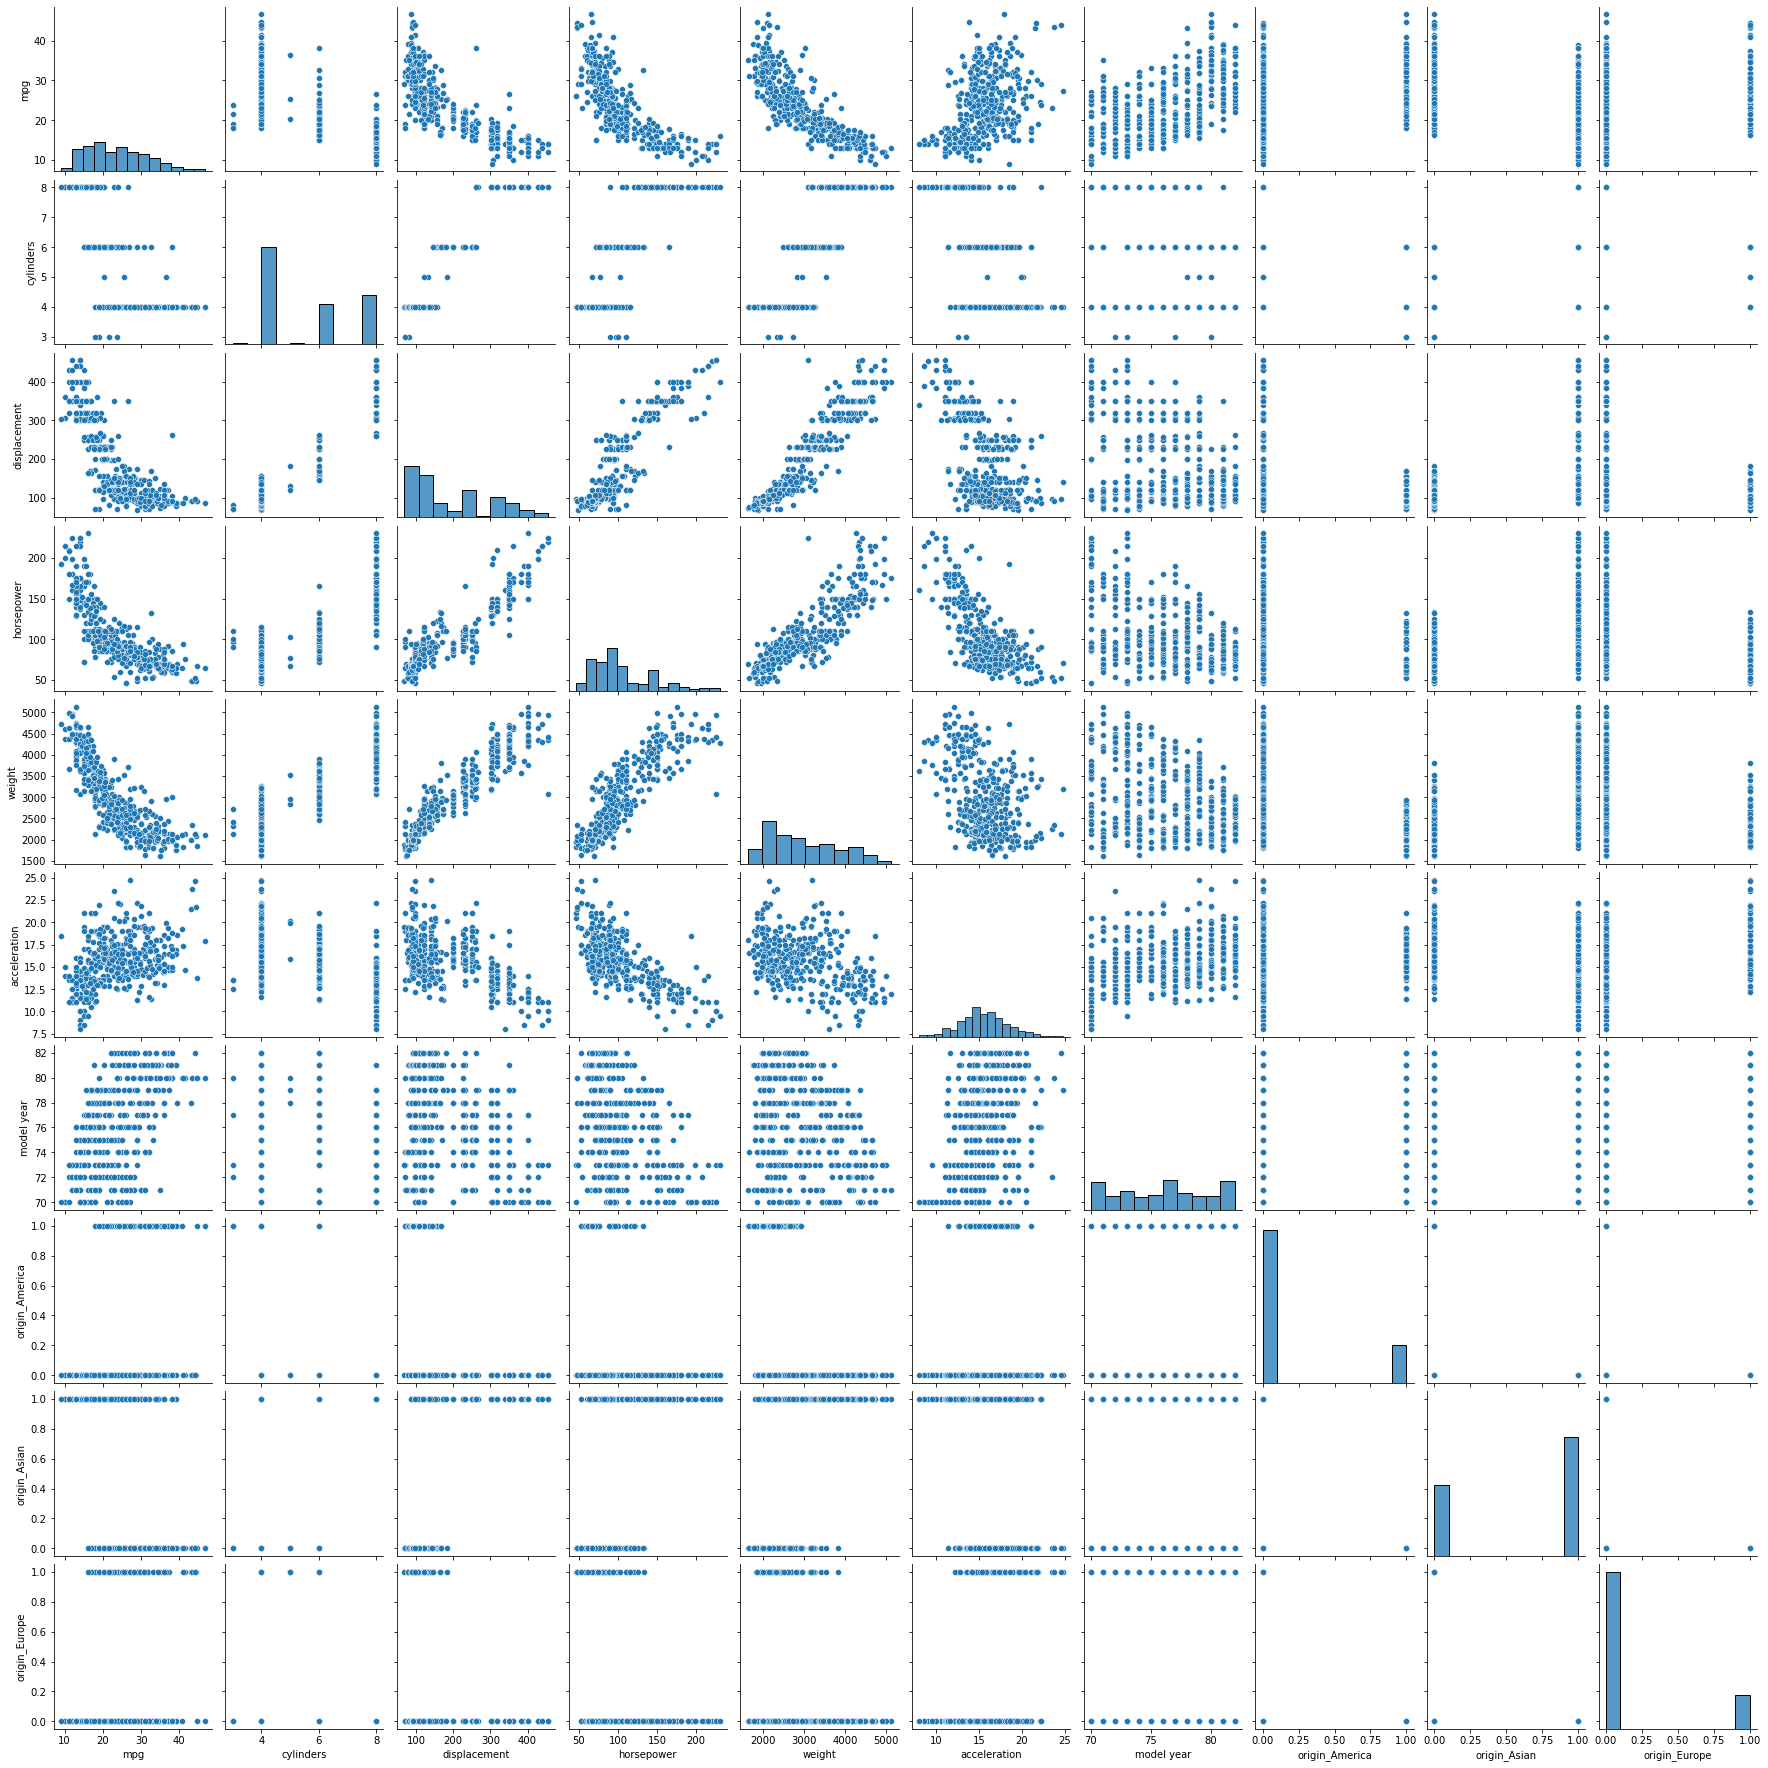

In [37]:
#bivariant plot
sns.pairplot(data)
plt.show()

In [38]:
x=data.drop(['mpg','origin_Europe'],axis=1)
y=data[['mpg']]

In [39]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asian
0,8,307.0,130.0,3504,12.0,70,0,1
1,8,350.0,165.0,3693,11.5,70,0,1
2,8,318.0,150.0,3436,11.0,70,0,1
3,8,304.0,150.0,3433,12.0,70,0,1
4,8,302.0,140.0,3449,10.5,70,0,1


In [40]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [41]:
x_train,x_test,y_train,y_test=
train_test_split(x,y,test_size=0.30,random_state=1)

#we have to take random_state to select random number for test and train data ,this will always fill with interger value.

In [42]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [43]:
for i,col_name in enumerate(x_train.columns):
    print("the coeff of {0} is {1}".format(col_name,regression_model.coef_[0][i]))

the coeff of cylinders is -0.39480796616481095
the coeff of displacement is 0.028945510765487126
the coeff of horsepower is -0.021752207723546683
the coeff of weight is -0.007352032065147356
the coeff of acceleration is 0.0619193660076193
the coeff of model year is 0.8369338917644991
the coeff of origin_America is -0.6060179643247354
the coeff of origin_Asian is -3.001283000918519


In [44]:
intercept=regression_model.intercept_[0]
print("the intercept of our model is {0}".format(intercept))

the intercept of our model is -18.28345111637211


### CHECKING SCORE OF THE MODEL WITH TRAIN AND TEST DATA

In [45]:
#R^2
#out sample
regression_model.score(x_test,y_test)

0.8433135132808831

In [46]:
#in sample
regression_model.score(x_train,y_train)

0.8141025501610559

# CONCLUSION:
From above we can conclude that our model perform well with test data, and it is clear from the plot that if horsepower is greater then the mileage will be less and the car having high weight will have low mileage.